#Ujian Praktik Computer Vision

**Zaki Maulana Rabbani**

**Kelas Predict**

Pada ujian praktik computer vision ini kami diminta untuk membuat sebuah model image classification yang mampu mengklasifikasikan gambar 4 jenis hewan yaitu kucing, rusa, anjing dan kuda. Hasil model ini kemudian diupload di kompetisi pada platform kaggle dan dilihat berapa akurasi yang dihasilkannya.

In [ ]:
#proses mount ke google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h1>Data Acquisition<h1>

Dataset bisa langsung didownload pada web kompetisi kaggle tersebut. Dataset yang didapat berformat zip file, sehingga perlu diekstrak terlebih dahulu. Selanjutnya dapat dilihat bahwa dalam file zip tersebut terdiri dari dua buah folder yaitu train, test, dan sebuah file sample submission. Selanjutnya kita deklarasikan manakah data training untuk setiap jenis hewan dan juga mana yang merupakan data testing. Disini dapat dilihat bahwa data training telah terpisah menjadi setiap jenis hewan sementara data testing tidak terpisah.

In [ ]:
#proses data acquisition dengan melakukan ekstrak file zip ke google drive
import os
import zipfile

In [ ]:
local_zip = 'drive/MyDrive/Ujian Praktik Computer Vision/4-animal-classification.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('drive/MyDrive/Ujian Praktik Computer Vision')

zip_ref.close()

In [ ]:
#directory untuk data train cat
train_cat_dir = os.path.join('drive/MyDrive/Ujian Praktik Computer Vision/train/cat')

#directory untuk data train deer
train_deer_dir = os.path.join('drive/MyDrive/Ujian Praktik Computer Vision/train/deer')

#directory untuk data train dog
train_dog_dir = os.path.join('drive/MyDrive/Ujian Praktik Computer Vision/train/dog')

#directory untuk data train horse
train_horse_dir = os.path.join('drive/MyDrive/Ujian Praktik Computer Vision/train/horse')

#directory untuk data test
test_dir = os.path.join('drive/MyDrive/Ujian Praktik Computer Vision/test/test')

<h1>Data Visualization<h1>

Pada bagian data visualization ini saya tunjukkan beberapa sampel data dan penyebarannya, tujuannya adalah agar lebih memahami bagaimana bentuk dan isi dari dataset yang dimiliki. Visualisasi yang saya lakukan mulai dari melakukan print beberapa sampel gambar dan juga nama filenya dari setiap jenis hewan. Saya juga menampilkan jumlah gambar untuk setiap jenis hewan lalu menampilkannya dalam bentuk bar plot dan pie chart agar dapat dilihat bagaimana jumlah gambar suatu hewan jika dibandingkan dengan jumlah jenis hewan lain. Bar plot menunjukkan jumlah sementara pie chart menunjukkan dalam bentuk persentase.

In [ ]:
#melakukan print 10 nama file gambar pertama untuk cat
train_cat_names = os.listdir(train_cat_dir)
print('Gambar kucing: ',train_cat_names[:10])

#melakukan print 10 nama file gambar pertama untuk deer
train_deer_names = os.listdir(train_deer_dir)
print('Gambar rusa: ',train_deer_names[:10])

#melakukan print 10 nama file gambar pertama untuk dog
train_dog_names = os.listdir(train_dog_dir)
print('Gambar anjing: ',train_dog_names[:10])

#melakukan print 10 nama file gambar pertama untuk horse
train_horse_names = os.listdir(train_horse_dir)
print('Gambar kuda: ',train_horse_names[:10])

#melakukan print 10 nama file gambar pertama untuk testing
test_names = os.listdir(test_dir)
print('Gambar test: ',test_names[:10])

Gambar kucing:  ['cat_1.jpg', 'cat_10.jpg', 'cat_100.jpg', 'cat_101.jpg', 'cat_102.jpg', 'cat_103.jpg', 'cat_104.jpg', 'cat_105.jpg', 'cat_106.jpg', 'cat_107.jpg']
Gambar rusa:  ['deer_1.jpg', 'deer_10.jpg', 'deer_100.jpg', 'deer_101.jpg', 'deer_102.jpg', 'deer_103.jpg', 'deer_104.jpg', 'deer_105.jpg', 'deer_106.jpg', 'deer_107.jpg']
Gambar anjing:  ['dog_1.jpg', 'dog_10.jpg', 'dog_100.jpg', 'dog_101.jpg', 'dog_102.jpg', 'dog_103.jpg', 'dog_104.jpg', 'dog_105.jpg', 'dog_106.jpg', 'dog_107.jpg']
Gambar kuda:  ['horse_1.jpg', 'horse_10.jpg', 'horse_100.jpg', 'horse_101.jpg', 'horse_102.jpg', 'horse_103.jpg', 'horse_104.jpg', 'horse_105.jpg', 'horse_106.jpg', 'horse_107.jpg']
Gambar test:  ['1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg', '103.jpg', '104.jpg', '105.jpg', '106.jpg', '107.jpg']


In [ ]:
#melakukan print jumalh gambar dari setiap jenis hewan
print('total gambar kucing:', len(os.listdir(train_cat_dir)))
print('total gambar rusa:', len(os.listdir(train_deer_dir)))
print('total gambar anjing:', len(os.listdir(train_dog_dir)))
print('total gambar kuda:', len(os.listdir(train_horse_dir)))

print('total gambar tes:', len(os.listdir(test_dir)))

total gambar kucing: 700
total gambar rusa: 600
total gambar anjing: 900
total gambar kuda: 600
total gambar tes: 729


In [ ]:
#melakukan print beberapa sampel dari data training yang ada
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#parameter grafik
nrows = 8
ncols = 8

#iterasi untuk gambar
pic_index = 0

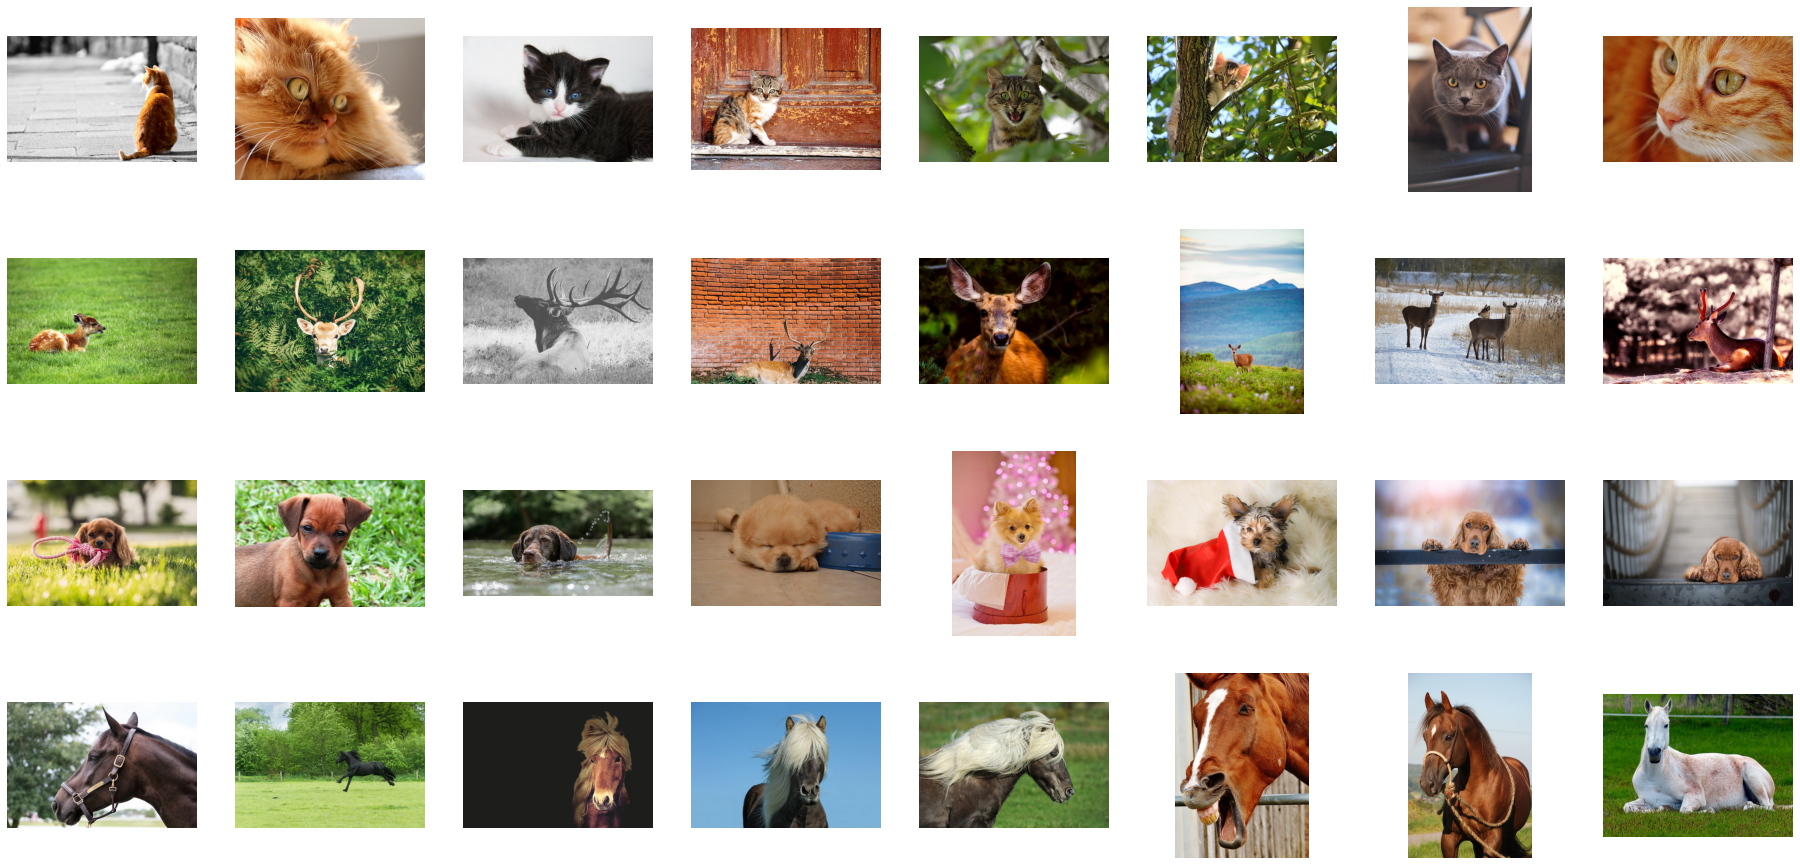

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pic = [os.path.join(train_cat_dir, fname) 
                for fname in train_cat_names[pic_index-8:pic_index]]
next_deer_pic = [os.path.join(train_deer_dir, fname) 
                for fname in train_deer_names[pic_index-8:pic_index]]
next_dog_pic = [os.path.join(train_dog_dir, fname) 
                for fname in train_dog_names[pic_index-8:pic_index]]
next_horse_pic = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pic + next_deer_pic + next_dog_pic + next_horse_pic):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') 

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
#visualisasi data dalam bentuk grafik
import pandas as pd

names = []
nums = []
data = {'Kelas':[],'Banyak sampel':[]}

for i in os.listdir('drive/MyDrive/Ujian Praktik Computer Vision/train/'):
    nums.append(len(os.listdir('drive/MyDrive/Ujian Praktik Computer Vision/train/'+i)))
    names.append(i)

data['Kelas']+=names
data['Banyak sampel']+=nums

#bentuk data frame
df = pd.DataFrame(data)
df

,Kelas,Banyak sampel
0,cat,700
1,deer,600
2,dog,900
3,horse,600


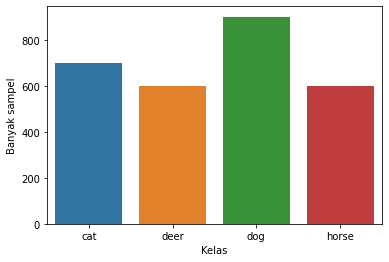

In [ ]:
#jumlah gambar setiap jenis hewan dalam bentuk bar plot
import seaborn as sns

sns.barplot(x=df['Kelas'],y=df['Banyak sampel'])

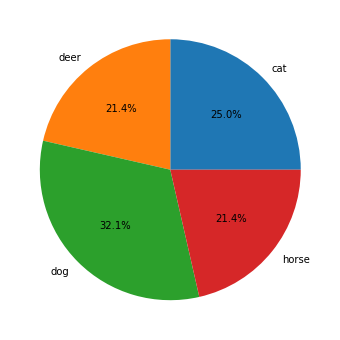

In [ ]:
#persentase setiap jenis hewan dalam bentuk pie chart
plt.figure(figsize=(15,6))
plt.pie(df['Banyak sampel'], labels=df['Kelas'], autopct='%1.1f%%')
plt.show()

Disini bisa dilihat jika data train paling banyak jumlahnya adalah dataset anjing diikuti oleh kucing, sementara jumlah rusa dan kuda sama.

<h1>Preprocessing Gambar<h1>

Pada bagian preprocessing ini, dataset gambar dipersiapkan sebelum masuk ke bagian model. Hal ini diperlukan agar setiap gambar yang masuk memiliki 'bentuk' yang sama sehingga proses dan hasil dari training nantinya bisa lebih baik. Selain itu, kita juga akan memisahkan dataset training dan juga testing.

Pertama, kita deklarasikan variabel image_datagen dengan menggunakan library ImageDataGenerator kita bisa melakukan perubahan pada gambar mulai dari rescale, mengubah ukurannya, melakukan rotasi dan juga memabagi gambar menjadi training (80%) dan validation/test (20%). Selanjutnya kita deklarasikan variabel untuk data training yaitu train generator lalu kita ubah sesuai denga parameter dari image_datagen, kita berikan path dari data training tersebut, nilai ukuran target yaitu 224x224 dengan ukuran batch 32. Untuk proses data testing sama dengan data training namun disini kita bisa lihat bahwa untuk data test/validation kita tetap gunakan file gambar dari folder train hal ini dilakukan karena pada folder test setiap jenis gambar belum terpisah sehingga kita ambil dari folder train yang telah terpisah.

Hasil dari preprocessing ini menunjukkan ada 2240 gambar untuk training dan 560 gambar untuk test/validation yang terbagi menjadi 4 kelas.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#gambar akan di rescaling menjadi 1./255
image_datagen = ImageDataGenerator(rescale = 1./255 , rotation_range=20,
                                   width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  horizontal_flip=True, validation_split=0.2)

#membuat variabel untuk training dengan nama train generator menggunakan image_datagen
train_generator = image_datagen.flow_from_directory(
        'drive/MyDrive/Ujian Praktik Computer Vision/train/',  #directory untuk data train
        subset= 'training',
        target_size=(224, 224),  #gambar diresize menjadi 224x224
        batch_size=32)   #batch size digunakan 32

#membuat variabel untuk training dengan nama test generator menggunakan image_datagen
test_generator = image_datagen.flow_from_directory(
        'drive/MyDrive/Ujian Praktik Computer Vision/train/',  #directory untuk data test
        subset= 'validation',
        target_size=(224, 224),  #gambar diresize menjadi 224x224
        batch_size=32)   #batch size digunakan 32

Found 2240 images belonging to 4 classes.
Found 560 images belonging to 4 classes.


<h1>Modelling<h1>

Pada bagian modeling ini kita akan membentuk model dengan memanfaatkan transfer learning agar hasil akurasi yang baik. Pertama kita deklarasikan dulu library yang dibutuhkan mulai dari tensorflow, numpy, sklearn, keras, dll. Kita akan menggunakan model transfer learning yaitu Xception yang bisa diimport melalui library keras.Kita deklarasikan model xception ini dengan beberapa parameternya, mulai dari include_top dengan nilai False, weights menggunakan imagenet, dan input_shape mengikuti shape gambar saaat preprocessing tadi yaitu 224*224 dengan channel 3. Setelah itu dihubungkan dengan fully connected layer dengan fungsi aktivasi ReLu dan softmax karena klasifikasi gambar bersifat kategorikal lebih dari 2.

Setelah modeling selesai maka model ini dicompile dengan memanfaatkan optimizer SGD dengan learning rate 0.0005 dan momentum 0.9. Untuk loss digunakan categorical_crossentropy karena kelas yang lebih dari 2 dan digunakan metricsnya akurasi.

In [ ]:
#deklarasi library
import tensorflow as tf
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, GlobalAveragePooling2D
from keras import activations

In [ ]:
#modelling

#menggunakan xception sebagai model transfer learning
xception= tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3))

#digabungkan dengan fully connected layer
model = Sequential()
model.add(xception)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dense(4, activation="softmax" , name="classification"))

In [ ]:
#model dicompile dengan optimizers SGD
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0005,momentum=0.9), 
            loss='categorical_crossentropy',
            metrics = ['accuracy'])

<h1>Training<h1>

Model ini kemudian ditraining dengan data dari train_generator yang merupakan data training, untuk validation_data menggunakan test_generator yang merupakan data test atau validasi dengan epoch 10.

Untuk hasil akhirnya dapat dilihat model ini menghasilakan akurasi model 94.24% dengan loss 16.21%.

In [ ]:
#dilakukan training dengan 10 epoch
history = model.fit(train_generator , validation_data = test_generator , epochs = 10)

Epoch 1/10
70/70 [==============================] - 64s 852ms/step - loss: 1.2773 - accuracy: 0.4665 - val_loss: 0.9139 - val_accuracy: 0.8179
Epoch 2/10
70/70 [==============================] - 58s 829ms/step - loss: 0.9439 - accuracy: 0.7915 - val_loss: 0.5223 - val_accuracy: 0.9071
Epoch 3/10
70/70 [==============================] - 59s 833ms/step - loss: 0.6214 - accuracy: 0.8665 - val_loss: 0.3538 - val_accuracy: 0.9161
Epoch 4/10
70/70 [==============================] - 58s 831ms/step - loss: 0.4173 - accuracy: 0.9085 - val_loss: 0.2789 - val_accuracy: 0.9268
Epoch 5/10
70/70 [==============================] - 59s 834ms/step - loss: 0.3127 - accuracy: 0.9205 - val_loss: 0.2211 - val_accuracy: 0.9411
Epoch 6/10
70/70 [==============================] - 58s 832ms/step - loss: 0.2632 - accuracy: 0.9326 - val_loss: 0.1901 - val_accuracy: 0.9429
Epoch 7/10
70/70 [==============================] - 58s 829ms/step - loss: 0.2203 - accuracy: 0.9375 - val_loss: 0.1755 - val_accuracy: 0.9446

<h1>Evaluasi Model<h1>

Model yang sudah ditraining kemudian kita evaluasi dengan menggunakan test_generator, hasilnya akan diplot untuk menunjukkan nilai loss dan validasi loss juga akurasi dan akurasi validasi.

Dari hasil evaluasi ini dapat dilihat bahwa model yang dibuat memiliki akurasi 95.18%.

18/18 [==============================] - 9s 515ms/step - loss: 0.1419 - accuracy: 0.9518


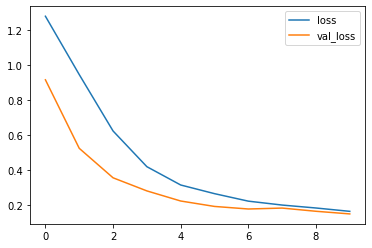

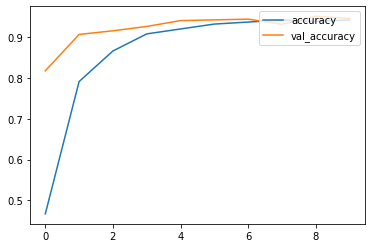

In [ ]:
#model di evaluasi dan di plot lossnya
model.evaluate(test_generator)

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='upper right')
plt.show()

<h1>Output Program<h1>

Untuk melakukan submit pada kompetisi kaggle diharuskan menggunakan format csv dengan contoh pada file Sample_submission.csv yang diberikan. Oleh karena itu program dibawah ini adalah sebuah program untuk membuat output atau hasil klasifikasi gambar dalam bentuk file csv. Pertama kita buka dulu file Sample_submission.csv dan kita lihat isinya menggunakan pandas dan juga kita buka folder test yang berisi gambar untuk testing. Selanjutnya kita lakukan proses labeling untuk seluruh gambar pada folder test ini dengan memanfaatkan perulangan for. Hasil dari labeling ini kemudian dimasukan pada format Sample_submission.csv sebelumnya kemudian di write file baru dengan label yang sudah terisi.

Selanjutnya saya juga menambahkan program dimana kita bisa menginput salah satu gambar dari folder test atau gambar apapun kemudian setelah melewati prediksi akan dimunculkan hasil klasifikasi dari gambar tersebut. Disini bisa dilihat saya menginput gambar kuda dan sistem bisa mengklasifikasikannya sebagai gambar kuda dengan benar.

In [ ]:
#membuat file csv untuk submission berdasarkan contoh yang ada
sub_csv ='drive/MyDrive/Ujian Praktik Computer Vision/Sample_submission.csv'  #directory untuk sample submission
path_test = 'drive/MyDrive/Ujian Praktik Computer Vision/test/test'  #directory untuk data test

In [ ]:
#membuka file sample submission
df_sub = pd.read_csv(sub_csv)
image_id = df_sub['ID']
df_sub.head(10)

,ID,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


In [ ]:
#proses labelling untuk setiap gambar pada data test

from tensorflow.keras.preprocessing.image import load_img

labels = []

for i in image_id:
    image = load_img(path_test+'/'+str(i)+'.jpg', target_size=(224, 224))
    img = np.array(image)
    img = img / 255.0
    img = img.reshape(1,224,224,3)
    label = model.predict(img)
    label_id = label[0].tolist()
    
    labels.append(label_id.index(max(label_id)))

In [ ]:
#label yang sudah dihasilkan diinput pada label yang sebelumnya kosong 
    
df_sub['Label'] = labels
df_sub.head(10)

,ID,Label
0,1,1
1,2,0
2,3,2
3,4,3
4,5,2
5,6,1
6,7,3
7,8,0
8,9,3
9,10,2


In [ ]:
#dibuat file csv baru untuk menampung hasil labeling
df_sub.to_csv('drive/MyDrive/Ujian Praktik Computer Vision/submission_file.csv',index=False)

Saving 9.jpg to 9 (1).jpg
9.jpg ini adalah kuda


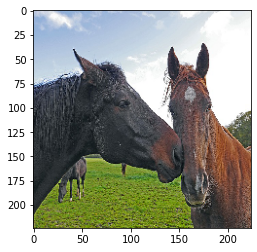

In [ ]:
#program untuk test labeling per gambar
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  #gambar prediksi berdasarkan labelnya
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  img = np.array(img)
  img = img / 255.0
  img = img.reshape(1,224,224,3)
  label = model.predict(img)
  label_id = label[0].tolist()
    
  labels.append(label_id.index(max(label_id)))

  if labels == 0:
    print(fn + " ini adalah kucing")
  elif labels == 1:
    print(fn + " ini adalah rusa")
  elif labels == 2:
    print(fn + " ini adalah anjing")
  else:
    print(fn + " ini adalah kuda")
 